In [1]:

from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.plotting import figure, output_file, show
%matplotlib inline
from bokeh.plotting import show, output_notebook
from bokeh.models import ColumnDataSource, OpenURL, TapTool
import os
output_notebook()
os.system('jupyter trust Visualisation_search_terms_reading_levelGS.ipynb')

Loading BokehJS ...

256

Rick Gerkin [3:16 PM]
Here is the list of ideas/suggestions I promised:
- Reduce the amount of stuff in the progress report.  You can have a different one for each week, or just copy them as needed, and remove all the stuff that isn't pertinent to the current work.  You can always bring it back in later.  If rendering figures, just render the ones you need to show the point.  


- Show some raw values in the table, e.g. the input resistance for a candidate model.  You don't need to show the test observation values, except maybe outside the table on a separate line (since they are the same for every gene using the same test).  

- Try scaling up to three parameters - you can reduce the grid sampling to, say 6x6x6 (from 10x10 for 2 parameters), that way it isn't too much more computationally complex. 

- Then you can show the corresponding figures and tables for this three parameter case, show all of the 2D cross-sections through the global optimum.  Or maybe you can think of other ways for showing 3D.  
- Make sure the code isn't getting too unwieldy.  Condense and refactor and clean up regularly.

In [8]:
import pickle


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math as math
from pylab import rcParams
from neuronunit.optimization.results_analysis import make_report
with open('pre_grid_reports.p','rb') as f:#
    grid_results = pickle.load(f)

with open('pre_ga_reports.p','rb') as f:
    package = pickle.load(f)
pop = package[0]
print(pop[0].dtc.attrs.items())
history = package[4]
gen_vs_pop =  package[6]

dict_items([('a', 1.2798129743607976), ('b', -4.8050559895954645e-09), ('vr', -71.312405309586524)])


In [79]:
print(pop[0].dtc.scores.items())

print(pop[0].dtc.score.items())


dict_items([('RheobaseTestP', 0.0015989784824320674)])
dict_items([('RheobaseTestP', {'value': 0.9984010215175679, 'prediction': {'value': array(172.03776041666666) * pA}, 'observation': {'std': array(47.690512683342) * pA, 'mean': array(172.133333333333) * pA, 'n': 4}}), ('InputResistanceTest', {'value': 1.53815349335229e-06, 'prediction': {'value': array(83878425.01418728) * kg*m**2/(s**3*A**2)}, 'observation': {'std': array(77633160.8333564) * ohm, 'mean': array(457000000.0) * ohm, 'n': 1}})])


(0.86106448591747276, 109) (1.0, 143)


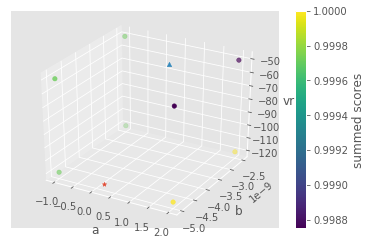

(0.86106448591747276, 109) (1.0, 143)


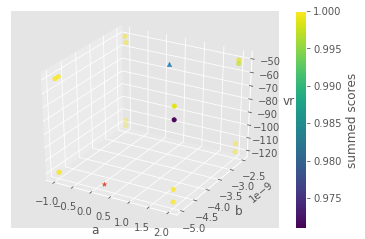

(0.86106448591747276, 109) (1.0, 143)


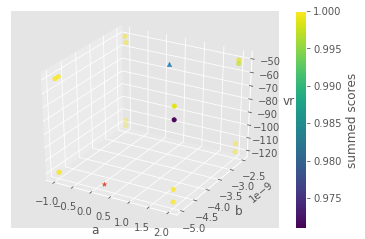

(0.86106448591747276, 109) (1.0, 143)


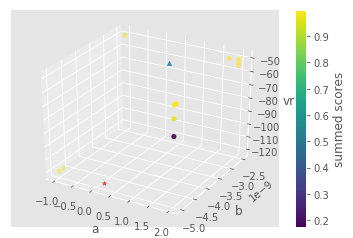

(0.86106448591747276, 109) (1.0, 143)


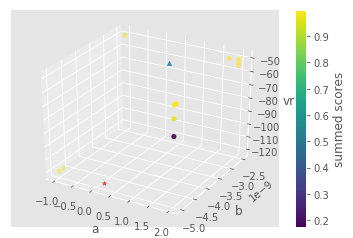

(0.86106448591747276, 109) (1.0, 143)


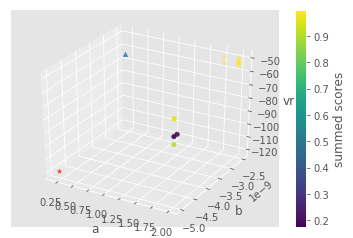

(0.86106448591747276, 109) (1.0, 143)


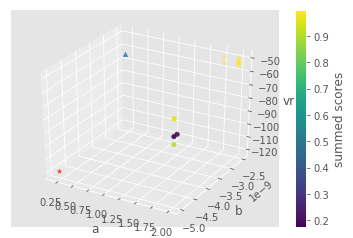

(0.86106448591747276, 109) (1.0, 143)


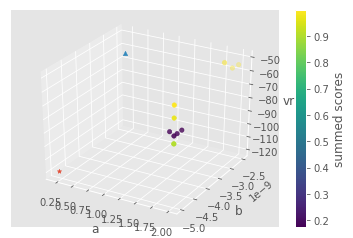

(0.86106448591747276, 109) (1.0, 143)


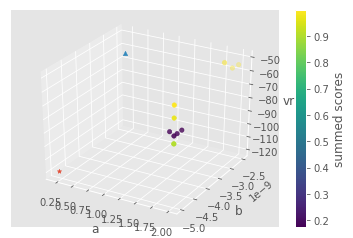

(0.86106448591747276, 109) (1.0, 143)


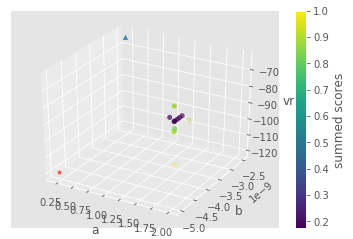

(0.86106448591747276, 109) (1.0, 143)


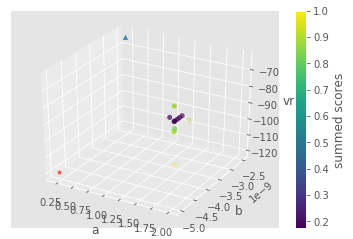

(0.86106448591747276, 109) (1.0, 143)


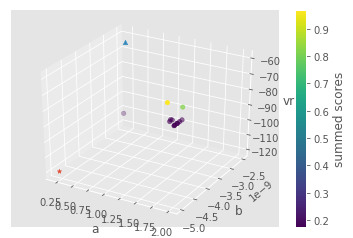

(0.86106448591747276, 109) (1.0, 143)


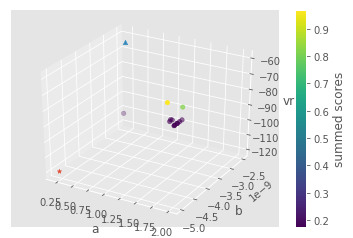

(0.86106448591747276, 109) (1.0, 143)


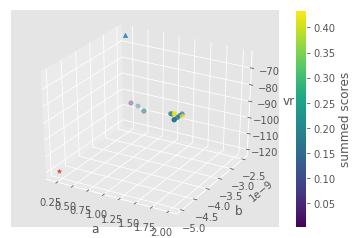

(0.86106448591747276, 109) (1.0, 143)


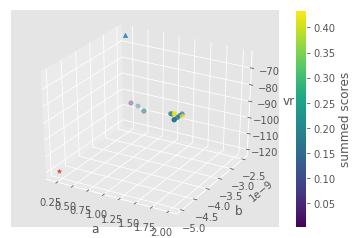

(0.86106448591747276, 109) (1.0, 143)


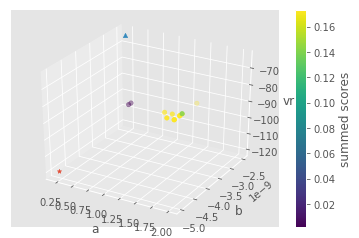

(0.86106448591747276, 109) (1.0, 143)


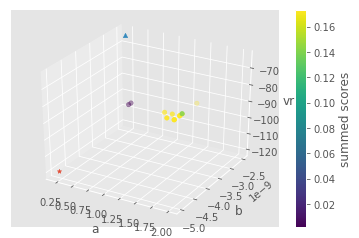

(0.86106448591747276, 109) (1.0, 143)


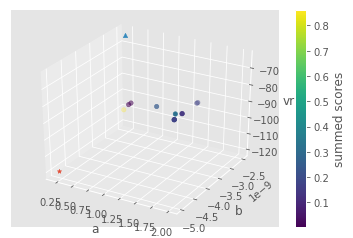

(0.86106448591747276, 109) (1.0, 143)


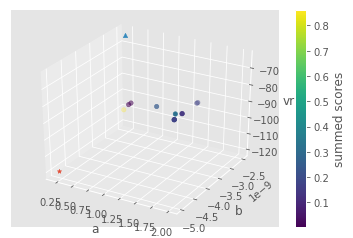

(0.86106448591747276, 109) (1.0, 143)


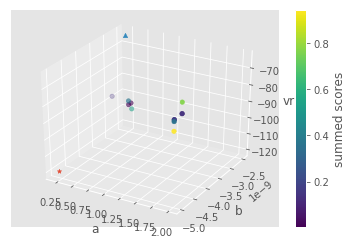

(0.86106448591747276, 109) (1.0, 143)


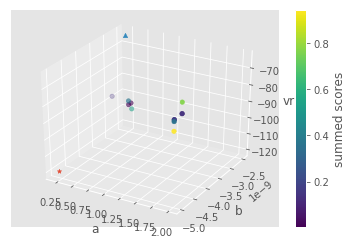

(0.86106448591747276, 109) (1.0, 143)


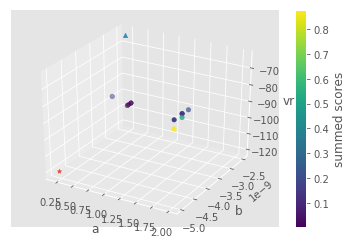

(0.86106448591747276, 109) (1.0, 143)


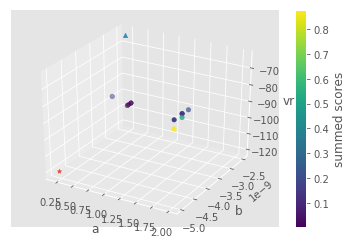

(0.86106448591747276, 109) (1.0, 143)


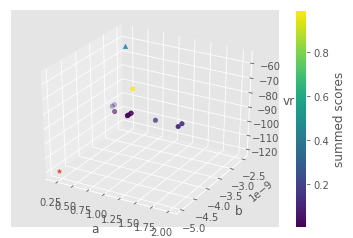

(0.86106448591747276, 109) (1.0, 143)


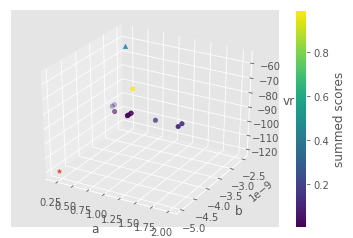

(0.86106448591747276, 109) (1.0, 143)


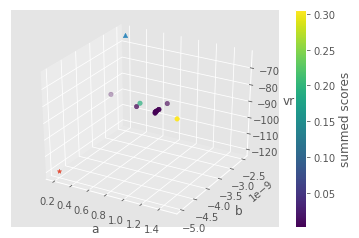

(0.86106448591747276, 109) (1.0, 143)


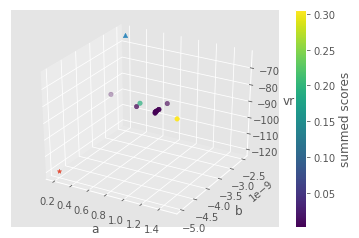

(0.86106448591747276, 109) (1.0, 143)


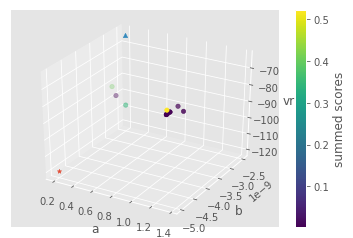

(0.86106448591747276, 109) (1.0, 143)


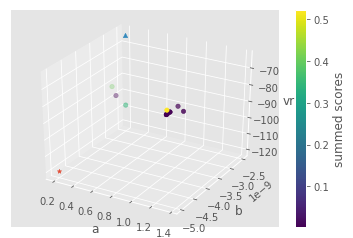

In [85]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

for i, pop in enumerate(gen_vs_pop):        
    other_points = []
    pf_points = []
    hof_points = []    
    labels = []

    for p in pop:
        xyz = []
        for k,v in p.dtc.attrs.items():
            xyz.append(v)
            labels.append(k)
        other_points.append(xyz)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    errors = [ np.sum(list(p.dtc.scores.values())) for p in pop ]
    #print(errors)
    #n = 100

    # For each set of style and range settings, plot n random points in the box
    # defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
    #for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    #for e in errors:    
    xx = [ i[0] for i in other_points ]
    yy = [ i[1] for i in other_points ]
    zz = [ i[2] for i in other_points ]
    p = ax.scatter(xx, yy, zz, c=errors, marker='o')
    cb = fig.colorbar(p)
    cb.set_label('summed scores')
        
    zz = [ np.sum(list(i.dtc.scores.values())) for i in grid_results ]
    zz_sorted = sorted([( np.sum(list(i.dtc.scores.values())), index) for index,i in enumerate(grid_results) ])
    gbest = zz_sorted[0]
    gworst = zz_sorted[-1]
    assert gbest!=gworst
    print(gbest,gworst)
    gworst_grid_attrs = grid_results[gworst[1]].dtc.attrs
    gbest_grid_attrs = grid_results[gbest[1]].dtc.attrs
    

    xyz = []
    for k,v in pop[0].dtc.attrs.items():
        xyz.append(gworst_grid_attrs[k])

    p = ax.scatter(xyz[0], xyz[1], xyz[2], marker='*',label='worst')

    xyz = []

    for k,v in pop[0].dtc.attrs.items():
        xyz.append(gbest_grid_attrs[k])    
    #bw.append(xyz)


    p = ax.scatter(xyz[0], xyz[1], xyz[2], marker='^',label='best')


    ax.set_xlabel(str(labels[0]))
    ax.set_ylabel(str(labels[1]))
    ax.set_zlabel(str(labels[2]))
    plt.savefig('particle_cube'+str(i)+str('.png'))
    plt.show()

<Figure size 432x288 with 0 Axes>

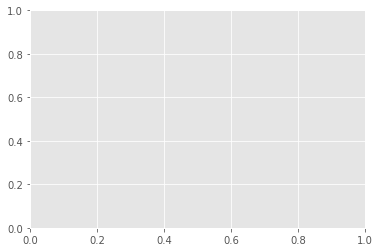

In [49]:

from neuronunit.optimization import exhaustive_search
    
    
with open('pre_grid_reports.p','rb') as f:
    grid_results = pickle.load(f)
    

with open('pre_ga_reports.p','rb') as f:
    package = pickle.load(f)

plt.clf()
fig, ax = plt.subplots(1)
axis = [ [ str('vr'), str('a'), str('b') ], [ str('vr'), str('b'), str('a')], [ str('b'), str('a'), str('vr') ] ]

#print(best_grid_attrs)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in true_divide


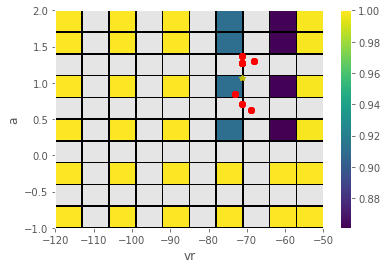

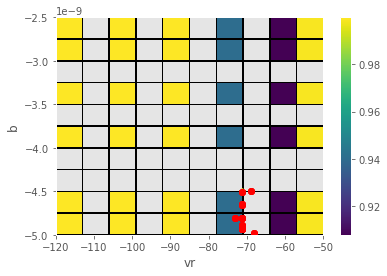

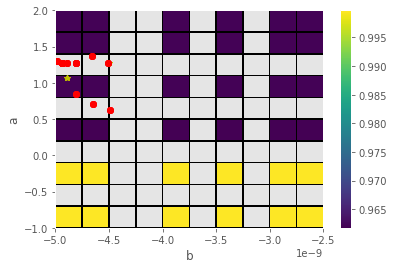

In [92]:
gen_vs_pop = package[6]    
pop = gen_vs_pop[-1]

for k in axis:    
    
    
    zz = [ np.sum(list(i.dtc.scores.values())) for i in grid_results ]
    yy = [ i.dtc.attrs[k[1]] for i in grid_results ]
    xx = [ i.dtc.attrs[k[0]] for i in grid_results ]
    '''
    zz_sorted = sorted([( np.sum(list(i.dtc.scores.values())), index) for index,i in enumerate(grid_results) ])
    gbest = zz_sorted[0]
    gworst = zz_sorted[-1]
    assert gbest!=gworst
    gworst_grid_attrs = grid_results[gworst[1]].dtc.attrs

    gbest_grid_attrs = grid_results[gbest[1]].dtc.attrs
    gba = gbest_grid_attrs[k[2]]   
    zz = [ np.sum(list(i.dtc.attrs.values())) for i in grid_results ]
    zce = [ np.sum(list(i.dtc.scores.values())) for i in grid_results if i.dtc.attrs[k[2]] == gba]
    yy = [ i.dtc.attrs[k[1]] for i in grid_results if i.dtc.attrs[k[2]] == gba ]
    xx = [ i.dtc.attrs[k[0]] for i in grid_results if i.dtc.attrs[k[2]] == gba ]
    
    '''
    #hof = package[1]
    #pf = package[2]
    last_frame = len(gen_vs_pop)
    other_points = []
    pf_points = []
    hof_points = []
    labels = []
    
    pf = package[2]
    hof = package[1]
    
    for p in pop:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            other_points.append(xy)
            
            
    for p in pf:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            pf_points.append(xy)            
       
    for p in hof:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            hof_points.append(xy)        

            
    zi, yi, xi = np.histogram2d(yy, xx, bins=(10,10), weights=zz, normed=False)
    counts, _, _ = np.histogram2d(yy, xx, bins=(10,10))
    #binned , _, _ = np.histogram(zce, bins=10)

    zi = zi / counts
    zi = np.ma.masked_invalid(zi)
    fig, ax = plt.subplots()
    scat = ax.pcolormesh(xi, yi, zi, edgecolors='black')

    fig.colorbar(scat)
    ax.margins(0.05)

    #if i == last_frame-1:
    for xy in hof_points:
        ax.plot(xy[0], xy[1],'y*',label ='hall of fame') 
    for xy in pf_points:
        ax.plot(xy[0], xy[1],'b*',label ='pareto front') 
        #legend = ax.legend([rect("r"), rect("g"), rect("b")], ["gene population","pareto front","hall of fame"])


    for xy in other_points:
        ax.plot(xy[0], xy[1],'ro',label ='gene population') 
    ax.margins(0.05)

    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.show()


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in true_divide


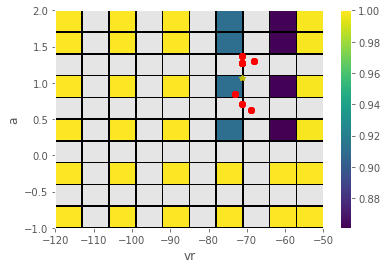

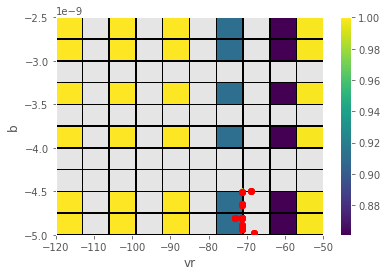

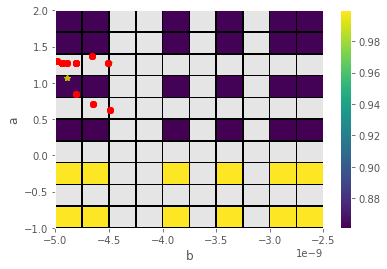

In [90]:

gen_vs_pop = package[6]    
pop = gen_vs_pop[-1]

for k in axis:    
    
    
    zz = [ np.sum(list(i.dtc.scores.values())) for i in grid_results ]
    zz_sorted = sorted([( np.sum(list(i.dtc.scores.values())), index) for index,i in enumerate(grid_results) ])
    gbest = zz_sorted[0]
    gworst = zz_sorted[-1]
    assert gbest!=gworst
    gworst_grid_attrs = grid_results[gworst[1]].dtc.attrs

    gbest_grid_attrs = grid_results[gbest[1]].dtc.attrs
    gba = gbest_grid_attrs[k[2]]   
    zz = [ np.sum(list(i.dtc.attrs.values())) for i in grid_results ]
    zce = [ np.sum(list(i.dtc.scores.values())) for i in grid_results if i.dtc.attrs[k[2]] == gba]
    yy = [ i.dtc.attrs[k[1]] for i in grid_results if i.dtc.attrs[k[2]] == gba ]
    xx = [ i.dtc.attrs[k[0]] for i in grid_results if i.dtc.attrs[k[2]] == gba ]
    
    
    #hof = package[1]
    #pf = package[2]
    last_frame = len(gen_vs_pop)
    other_points = []
    pf_points = []
    hof_points = []
    labels = []
    
    pf = package[2]
    hof = package[1]
    
    for p in pop:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            other_points.append(xy)
            
            
    for p in pf:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            pf_points.append(xy)            
       
    for p in hof:
        xy = []
        for key in k:
            v = p.dtc.attrs[key]
            xy.append(v)
            labels.append(key)
            hof_points.append(xy)        

            
    zi, yi, xi = np.histogram2d(yy, xx, bins=(10,10), weights=zce, normed=False)
    counts, _, _ = np.histogram2d(yy, xx, bins=(10,10))
    #binned , _, _ = np.histogram(zce, bins=10)

    zi = zi / counts
    zi = np.ma.masked_invalid(zi)
    fig, ax = plt.subplots()
    scat = ax.pcolormesh(xi, yi, zi, edgecolors='black')

    fig.colorbar(scat)
    ax.margins(0.05)

    #if i == last_frame-1:
    for xy in hof_points:
        ax.plot(xy[0], xy[1],'y*',label ='hall of fame') 
    for xy in pf_points:
        ax.plot(xy[0], xy[1],'b*',label ='pareto front') 
        #legend = ax.legend([rect("r"), rect("g"), rect("b")], ["gene population","pareto front","hall of fame"])


    for xy in other_points:
        ax.plot(xy[0], xy[1],'ro',label ='gene population') 
    ax.margins(0.05)

    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.show()


So imagine 6 2D plots.  The first three are:  XY at Z=z, XZ at Y=y, and YZ at X=x, where x, y, z 
is the location of the global minimum.  The second three are XY with the minimum taken across Z, 
XZ with the minumum taken across Y, YZ, with the minimum taken across X.
With these 6 I think you would get a pretty good idea of the contours around the global minimum.

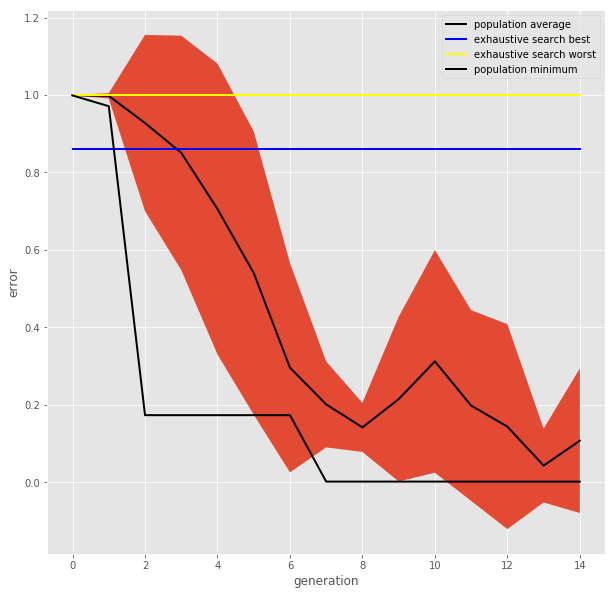

In [20]:


with open('pre_ga_reports.p','rb') as f:
    package = pickle.load(f)
log = package[3]    
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
fig, axes = plt.subplots(figsize=(10, 10), facecolor='white')
#log = package[3]
gen_numbers = [ i for i in range(0,len(log.select('gen'))) ]

mean = np.array([ np.sum(i) for i in log.select('avg')])
std = np.array([ np.sum(i) for i in log.select('std')])
minimum = np.array([ np.sum(i) for i in log.select('min')])
#minimum = np.array([ np.sum(i) for i in log.select('min')])
worst = np.max([ sum(g.dtc.scores.values()) for g in grid_results ])
#grid_min = np.min([ sum(g.dtc.scores.values()) for g in grid_results ])
gwl = [ worst for i in range(0,len(log.select('gen'))) ]
grid_min = np.min([ sum(g.dtc.scores.values()) for g in grid_results ])
gml = [ grid_min for i in range(0,len(log.select('gen'))) ]

stdminus = mean - std
stdplus = mean + std

axes.plot(
    gen_numbers,
    mean,
    color='black',
    linewidth=2,
    label='population average')

axes.plot(gen_numbers,
          gml,
          color='blue',
        linewidth=2,
        label='exhaustive search best')

   
axes.plot(gen_numbers,
          gwl,
          color='yellow',
        linewidth=2,
        label='exhaustive search worst')
       


axes.plot(
    gen_numbers,
    minimum,
    color='black',
    linewidth=2,
    label='population minimum')
axes.fill_between(gen_numbers, stdminus, stdplus)



plt.xlabel('generation')
plt.ylabel('error')


plt.legend()
plt.show()

In [26]:
new_report = make_report(grid_results,pop, 3)


Report: 
did it work? True was it better True
the difference between brute force candidates model parameters and the GA's model parameters:
-1.0798129743607974 0.2 1.27981297436 a
the relative distance scaled by the length of the parameter dimension of interest:
0.35993765812
the difference between brute force candidates model parameters and the GA's model parameters:
2.3050559895954645e-09 -2.5e-09 -4.8050559896e-09 b
the relative distance scaled by the length of the parameter dimension of interest:
0.922022395838
the difference between brute force candidates model parameters and the GA's model parameters:
7.312405309586524 -64.0 -71.3124053096 vr
the relative distance scaled by the length of the parameter dimension of interest:
0.104462932994
[0.0015989784824320674]
[0.0015989784824320674]
the difference between brute force candidates model parameters and the GA's model parameters:
-1.0798129743607974 0.2 1.27981297436 a
the relative distance scaled by the length of the parameter dim

# Progress Report and Documentation


What I have been working on. 
1. Updating Docker-stacks dockerfile build instructions in order to make a HPC ready Dockerbuild.
2. Updating the aforementioned stack, in order to perform regular maintance and to fix build problems due to 
updates of upstream software sources.
3. Debugging and visualisation of the BluePyOpt GA algorithm.


## Other work
1.  The people at BluePyOpt (Werner) agreed to make a scidash branch, they want me to make use extensibility and inheritence. Such that my scidash derivation of BluePyOpt inherits from and extends as much as possible the parent class of their elitist branch at BPO.


## Resolving Docker Build issues. 

* Issue 1 Upgrading pip to pip10, breaks NU installation.
Work around: re-write setup.py to exclude problems associated with process dependency links.

    
* Issue 2   
Developing in BPO and NU simultaneously requires a dockerfile at to build from a location at one location down in the directory hierarchy: There is a need to install both packages using the pip -e paradigm (file changes during session at developer locations, effect modules that are in sys.path):
** ADD neuronunit neuronunit
** ADD BluePyOpt BluePyOpt
To this end scidash opt was created.
https://github.com/russelljjarvis/scidashopt


In [ ]:
from sklearn.grid_search import ParameterGrid
#dir()

In [ ]:
import bokeh
import numpy as np
import matplotlib

In [ ]:


from neuronunit.optimization.optimization_management import run_ga
from neuronunit.optimization.exhaustive_search import run_grid, reduce_params, create_grid
from neuronunit.optimization.model_parameters import model_params
import os
import pickle
from neuronunit.optimization import get_neab
reports = {}
npoints = 10



with open('pre_grid_reports.p','rb') as f:
    packageg = pickle.load(f)
grid_results = packageg[0]   
opt_keys = list(grid_results[0].dtc.attrs.keys())

with open('pre_ga_reports.p','rb') as f:
    ga_out = pickle.load(f)



In [ ]:

from neuronunit.optimization.exhaustive_search import create_grid
gp = create_grid(npoints = 10,nparams = 2)

    


Found tough parameters for which the GA is not able to perform particularily # well. Suspect b's error surface is not concave.
Explore 1D cross section.


In [ ]:

plt.clf()

plt.scatter([g.dtc.attrs['a'] for g in pop ],[ sum(g.dtc.scores.values()) for g in pop ] ,label='ga pop')
plt.scatter([g.dtc.attrs['a'] for g in grid_results ],[ sum(g.dtc.scores.values()) for g in grid_results ] ,label='grid evaluations')
plt.ylabel('score')
plt.xlabel('gene attribute a')
plt.legend()
plt.show()


plt.scatter([g.dtc.attrs['vr'] for g in pop ],[ sum(g.dtc.scores.values()) for g in pop ] ,label='ga pop')
plt.scatter([g.dtc.attrs['vr'] for g in grid_results ],[ sum(g.dtc.scores.values()) for g in grid_results ] ,label='grid evaluations')
plt.ylabel('score')
plt.xlabel('gene attribute vr')
plt.legend()
plt.show()



In [ ]:
from neuronunit.optimization import exhaustive_search #import run_grid, reduce_params, create_grid

from neuronunit.optimization.exhaustive_search import run_grid, reduce_params, create_grid
grid_points,maps = exhaustive_search.create_grid(npoints=10,nparams=2,provided_keys=[str('vr'),str('a')])


In [ ]:
grid = np.zeros((10,10))

for i in grid_results:
    xy = []
    for k,v in i.dtc.attrs.items():
        xy.append(maps[k][v])
    grid[xy[0],xy[1]] = sum(i.dtc.scores.values())


from pylab import figure, cm
from matplotlib.colors import LogNorm


In [ ]:
new_list = genes_vs_gen[1:-0]
print(new_list)

#![alt text](rick_style_guide.png "Ricks table guide")

# Vr, and a
Why are the scores only for vt?
why does one of the parameters not matter in the grid but it does matter in the GA?

In [ ]:
#history = ga_out[4]
#print(dir(history))
#print(history.genealogy_index)
#print(history.genealogy_tree)
#print(history.genealogy_history)#

#print(history.genealogy_history[1].dtc.attrs)



In [ ]:
attrs_ = [ list(p.dtc.attrs.keys()) for i,p in history.genealogy_history.items() ]
attrs = attrs_[0]
print(attrs)

scores_ = [ list(p.dtc.scores.keys()) for i,p in history.genealogy_history.items() ]
scores = scores_[0]
from collections import OrderedDict

urlDats = []
hi = [ (i,p) for i,p in history.genealogy_history.items() ]
sc = [ (i,p) for i,p in enumerate(grid_results) ]

def history_iter(mapped):
    i,p = mapped
    urlDat = OrderedDict()
    urlDat['gene_number'] = i
    
    attrs = list(p.dtc.attrs.keys()) 
    scores = list(p.dtc.scores.keys()) 
    for a in attrs:
        urlDat[a] = p.dtc.attrs[a]    
    scores0 = scores[0]
    for s in scores:
        urlDat[s] = p.dtc.scores[s]
    urlDat[str('total')] = sum(p.dtc.scores.values())
    for k,v in p.dtc.score.items():
        urlDat[str(k)+str('_observation')] = v['observation']['mean'] 
        urlDat[str(k)+str('_prediction')] = v['observation']['mean'] 
    for k,v in p.dtc.scores.items():
        urlDat[str(k)] = v


    return urlDat
    
def process_dics(urlDats):
    dfs = []
    for urlDat in urlDats:
        # pandas Data frames are best data container for maths/stats, but steep learning curve.
        # Other exclusion criteria. Exclude reading levels above grade 100,
        # as this is most likely a problem with the metric algorithm, and or rubbish data in.
        # TODO: speed everything up, by performing exclusion criteri above not here.
        if len(dfs) == 0:
            dfs = pd.DataFrame(pd.Series(urlDat)).T
        dfs = pd.concat([ dfs, pd.DataFrame(pd.Series(urlDat)).T ])
    return dfs

genes = list(map(history_iter,hi))    
print(urlDats)
dfg = process_dics(genes)

grids = list(map(history_iter,sc))    
dfs = process_dics(grids)

dfg

In [ ]:
dfg

In [ ]:

with open('pre_ga_reports.p','rb') as f:
    package = pickle.load(f)

import pdb    
filtered = package[0][3]    

print(len(package))
print(package[0][-1])
print(package[0][-1])
#print(filtered)
#for gen in filtered[1:-1]:
    #print(f['nevals'])
#    pop = [g.dtc.scores for g in gen['nevals'] ]
#    print(pop)
    

In [ ]:
plt.clf()
fig, ax = plt.subplots(1)

zz = [ np.sum(list(i.dtc.scores.values())) for i in grid_results]
yy = [ i.dtc.attrs['vr'] for i in grid_results]
xx = [ i.dtc.attrs['a'] for i in grid_results]
from neuronunit.optimization import exhaustive_search


pop = package[0]


In [ ]:
matrices = log


In [ ]:

nparams = 1
import numpy as np
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math as math
from pylab import rcParams
from neuronunit.optimization import exhaustive_search
from neuronunit.optimization.exhaustive_search import run_grid

reports = {}
npoints = 10

nparams = 1

ga_out = run_ga(model_params,nparams)
grid_results = run_grid(npoints,nparams)

plt.clf()
plt.scatter(grid_results,[ sum(g.dtc.scores.values()) for g in grid_results ] )
plt.show()

miniga = min_max(ga_out[0])[0][1]

plt.clf()
plt.scatter(ga_out[0],[ sum(g.dtc.scores.values()) for g in ga_out[0] ] )
plt.scatter(grid_results,[ sum(g.dtc.scores.values()) for g in grid_results ] )
plt.scatter(miniga,int(len(grid_results)/2))
plt.show()


plt.clf()
plt.scatter(ga_out[0],[ sum(g.dtc.score.values()) for g in ga_out[0] ] )
plt.scatter(grid_results,[ sum(g.dtc.score.values()) for g in grid_results ] )
plt.show()

plt.clf()
for j in [ list(g.dtc.scores.values()) for g in grid_results ]:
    plt.scatter([i for i in range(0,len(j))] ,j)
plt.show()


In [ ]:
'''
garanked = [ (r.dtc.attrs , sum(r.dtc.scores.values())) for r in package[0] ]
garanked = sorted(garanked, key=lambda w: w[1]) 
miniga = garanked[0][1]
maxiga = garanked[-1][1]
results
'''

In [ ]:
'''
results[0]
gridranked = [ (r.dtc.attrs , sum(r.dtc.scores.values())) for r in results[0] ]
gridranked = sorted(ranked, key=lambda w: w[1]) 
mini = gridranked[0][1]
maxi = gridranked[-1][1]


print(mini,maxi)
quantize_distance = list(np.linspace(mini,maxi,10))

# check that the nsga error is in the bottom 1/5th of the entire error range.
print('Report: ')
print("Success" if bool(miniga < quantize_distance[0]) else "Failure")
print("The nsga error %f is in the bottom 1/5th of the entire error range" % miniga)
print("Minimum = %f; 20th percentile = %f; Maximum = %f" % (mini,quantize_distance[0],maxi))
'''

In [ ]:
'''
with open('all_ga_cell.p','rb') as f:
   results = pickle.load(f)
print(results[3])
'''


In [ ]:
import pandas as pd
for index, val in enumerate(pipe_results.values()):
    if index == 0:
        sci = pd.DataFrame(list(val['pop'][0].dtc.scores.values())).T
    else:    
        sci = sci.append(pd.DataFrame(list(val['pop'][0].dtc.scores.values())).T)
        
sci

In [ ]:
import pandas as pd
for index, val in enumerate(pipe_results.values()):
    if index == 0:
        attrs = pd.DataFrame(list(val['pop'][0].dtc.attrs.values())).T
    else:    
        attrs = attrs.append(pd.DataFrame(list(val['pop'][0].dtc.attrs.values())).T)
        
attrs.columns = val['pop'][0].dtc.attrs.keys()    
#print(attrs)
attrs

In [ ]:
import pandas as pd


#for index, val in enumerate(pop.values()):
for i in pop:
    if index == 0:
        #,columns=['Dice number','value'],index=[1,2,3,4])
        rheobase = pd.DataFrame([i.dtc.rheobase for i in pop]).T
    else:    
        rheobase = rheobase.append(pd.DataFrame([i.dtc.rheobase for i in val['pop']]).T)
        
rheobase

names = [ str('generation: ')+str(i) for i in range(0,len(rheobase)) ]

rheobase


In [ ]:
import matplotlib
%matplotlib inline


################
# GA parameters:
about $10^{3}=30$ models will be made, excluding rheobase search.
################


# Choice of selection criteria is important. 
Here we use BluepyOpts IBEA, such that it can be compared to NSGA2.

https://link.springer.com/article/10.1007/s00500-005-0027-5




In [ ]:
MU = 6; NGEN = 6; CXPB = 0.9
USE_CACHED_GA = False

################
# Grid search parameters:
$ 2^{10}=1024 $ models, will be made excluding rheobase search
################

An oppurtunity to improve grid search, by increasing resolution of search intervals given a first pass:

In [ ]:
from neuronunit.plottools import plot_surface


# Below two error surface slices from the hypervolume are plotted.
The data that is plotted consists of the error as experienced by the GA.
Note: the GA performs an incomplete, and efficient sampling of the parameter space, and therefore sample points are irregularly spaced. Polygon interpolation is used to visualize error gradients. Existing plotting code from the package BluePyOpt has been extended for this purpose.
Light blue dots indicate local minima's of error experienced by the NSGA algrorithm.


Mostly these plots show that a low error solution was found in each 2D plane, however occasionally the plots show, that a non optimal solution was arrived at.

In [ ]:
for index, val in enumerate(pipe_results.values()):
    td = val['td_py']
    history = val['history']

    plot_surface('a','b',td,history)

In [ ]:

for index, val in enumerate(pipe_results.values()):
    td = val['td_py']
    history = val['history']

    plot_surface('v0','vt',td,history)
    

In [ ]:
list(pipe_results.keys())
for k in pipe_results.keys():
    print(pipe_results[k]['hranked'])
pipe_results['100201']['hranked']

I am currently writing code that should enable the plotting of HOF values versus generation.

In [ ]:

dtcs = list(filter(lambda d: hasattr(d,'dtc'), pipe_results['100201']['hranked']))
dtcs = [d.dtc for d in dtcs ]
fitness = list(filter(lambda f: hasattr(f,'fitness'), pipe_results['100201']['hranked']))
fit_v_gen = [np.sum(f.fitness.values) for f in fitness ]

fit_v_gen



In [ ]:

print(pipe_results.keys())

scores = list(filter(lambda dtc: hasattr(dtc,'score'), dtcs))

print(scores)
import pickle
dominate
with open('protected/dominated_by_rheobase.p','rb') as f:
   pipe_results = pickle.load(f)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
fig, axes = plt.subplots(figsize=(10, 10), facecolor='white')
val = list(pipe_results.values())[0]
log = val['log']
gen_numbers = [ i for i in range(0,len(log.select('gen'))) ]
print(gen_numbers)


hof = val['hof_py']
mean = np.array([i for i in log.select('avg')])
std = np.array([ i for i in log.select('std')])
minimum = np.array([ i for i in log.select('min')])
best_line = [None,None]
best_line +=val['hranked']


stdminus = mean - std
stdplus = mean + std

axes.plot(
    gen_numbers,
    mean,
    color='black',
    linewidth=2,
    label='population average')


axes.plot(
    gen_numbers,
    best_line,
    color='black',
    linewidth=2,
    label='population average')




axes.plot(
    gen_numbers,
    minimum,
    color='black',
    linewidth=2,
    label='population minimum')
axes.fill_between(gen_numbers, stdminus, stdplus)
    
   

For some reason the global minimum solution is not converged on, as shown by the evolution of errors below:

In [ ]:

best_line = None
 
for k in pipe_results.keys():
    fig, axes = plt.subplots(figsize=(10, 10), facecolor='white')

    historiesc = [list(h.dtc.scores.values()) for h in pipe_results[k]['history'].genealogy_history.values() ]

    historiest = [(sum(h.dtc.scores.values()),h.dtc) for h in pipe_results[k]['history'].genealogy_history.values() ]
    ranked = sorted(historiest, key=lambda w: w[0],reverse = True) 
    pipe_results[k]['abs_min'] = ranked[0][1]
    
    historiess = [sum(h.dtc.scores.values()) for h in pipe_results[k]['history'].genealogy_history.values() ]
    min_line = np.min(historiess)    
    axes.plot([i for i in range(0,len(historiess)) ],
        historiess,
        color='black',
        linewidth=2,
        label='population average')
    

    axes.plot(
        [i for i in range(0, len(historiess)) ],
        [min_line for i in range(0, len(historiess)) ],
        color='black',
        linewidth=2,
        label='population average')




For some reason, the GA population does not converge to the absolute minimum, although it does sample it.
Perhaps the absolute minimum is a highly dominated solution, which is a testable hypthosis.

None the less because the GA samples the absolute minimum, this value can be corroborated with the GA.




print(pipe_results[k]['abs_min'].scores)
print(sum(pipe_results[k]['abs_min'].scores.values()))

print(pipe_results[k]['abs_min'].attrs)

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(figsize=(10, 10), facecolor='white')
val = list(pipe_results.values())[1]
log = val['log']
hof = val['hof_py']
mean = np.array([ np.sum(i) for i in log.select('avg')])
std = np.array([ np.sum(i) for i in log.select('std')])
gen_numbers = [ i for i in range(0,len(log.select('gen'))) ]


print(len(mean),len(std))
minimum = np.array([ np.sqrt(np.mean(np.square(i))) for i in log.select('min')])

historiess = [sum(h.dtc.scores.values()) for h in pipe_results[k]['history'].genealogy_history.values() ]
min_value = np.min(historiess)    


stdminus = mean - std
stdplus = mean + std
print


axes.plot(
    gen_numbers,
    mean,
    color='black',
    linewidth=2,
    label='population mean')



axes.fill_between(gen_numbers, stdminus, stdplus,label='+- std deviation')
plt.xlabel('generation')
plt.ylabel('error')


plt.legend()

In [ ]:
best_line = None
for k in pipe_results.keys():
    plt.style.use('ggplot')
    fig, axes = plt.subplots(figsize=(10, 10), facecolor='white')
    val = pipe_results[k]
    log = val['log']
    gen_numbers = [ i for i in range(0,len(log.select('gen'))) ]
    historiess = [sum(h.dtc.scores.values()) for h in pipe_results[k]['history'].genealogy_history.values() ]
    min_value = np.min(historiess)  
    

    axes.plot([i for i in range(0,len(pipe_results[k]['componentsh'] )) ],
        pipe_results[k]['componentsh'] ,
        linewidth=2,
        label='population average')
    

    axes.plot(
        [i for i in range(0,len(pipe_results[k]['componentsh'] )) ],
        [min_value for i in range(0,len(pipe_results[k]['componentsh'] ))  ],
        color='black',
        linewidth=2,
        label='population average')
    
    for i in pipe_results[k]['componentsh']:
        print(sum(i),min_value)
        if sum(i) == min_value:
            print('yes')

    




In [ ]:
##
# Rational, want to find out how dominated the best solution is:
##
best_line = None
for k in pipe_results.keys():
    plt.style.use('ggplot')
    fig, axes = plt.subplots(figsize=(10, 10), facecolor='white')
    val = pipe_results[k]
    log = val['log']
    
    historiest = [(sum(h.dtc.scores.values()),h.dtc) for h in pipe_results[k]['history'].genealogy_history.values() ]
    ranked = sorted(historiest, key=lambda w: w[0],reverse = True) 
    pipe_results[k]['abs_min'] = ranked[0][1]
    min_value = ranked[0][0]
    
    axis = [ i for i in range(0,len(ranked[0][1].scores.values())) ]
    plt.bar(axis,list(ranked[0][1].scores.values()),tick_label=list(ranked[0][1].scores.keys()))
    fig.autofmt_xdate()
    plt.title('neuroelectro_cell_{0}_{1}'.format(str(k),str('solution components')))
    plt.legend('left')


            
            
            

In [ ]:
for index, val in enumerate(pipe_results.values()):

    print(val['gen_vs_hof'])

# Comment on plot
The plot shows the mean error value of the population as the GA evolves it's population. The red interval at any instant is the standard deviation of the error. The fact that the mean GA error is able to have a net upwards trajectory, after experiencing a temporary downwards trajectory, demonstrates that the GA retains a drive to explore, and is resiliant against being stuck in a local minima. Also in the above plot population variance in error stays remarkably constant, in this way BluePyOpts selection criteria SELIBEA contrasts with DEAPs native selection strategy NSGA2

# Comment on plot
There is good agreement between traces produced by the best candidate found by Genetic Algorithm, and exhaustive grid search.

# Quantize distance between minimimum error and maximum error.
This step will allow the GA's performance to be located within or below the range of error found by grid search.


The code below reports on the differences between between attributes of best models found via grid versus attributes of best models found via GA search:


In [ ]:
'''
import pandas as pd

from neuronunit.optimization import evaluate_as_module as eam
NSGAO = NSGA(0.85)
NSGAO.setnparams(nparams=nparams,provided_keys=provided_keys)
#td = eam.get_trans_dict(NSGAO.subset)
#print(td)
td = { v:k for k,v in enumerate(td) }
from neuronunit.optimization import model_parameters as modelp
mp = modelp.model_params
#minimaga = pareto_dtc[0]
for k,v in minimagr_dtc.attrs.items():
    #hvgrid = np.linspace(np.min(mp[k]),np.max(mp[k]),10)
    dimension_length = np.max(mp[k]) - np.min(mp[k])
    solution_distance_in_1D = np.abs(float(hof[0][td[k]]))-np.abs(float(v))
        
    #solution_distance_in_1D = np.abs(float(minimaga.attrs[k]))-np.abs(float(v))
    relative_distance = dimension_length/solution_distance_in_1D
    print('the difference between brute force candidates model parameters and the GA\'s model parameters:')
    print(float(hof[0][td[k]])-float(v),hof[0][td[k]],v,k)
    print('the relative distance scaled by the length of the parameter dimension of interest:')
    print(relative_distance)

'''   
    

In [ ]:

print('the difference between the bf error and the GA\'s error:')
print('grid search:')
from numpy import square, mean, sqrt
rmsg = sqrt(mean(square(list(minimagr_dtc.scores.values()))))
print(rmsg)
print('ga:')
rmsga = sqrt(mean(square(list(dtc_pop[0].scores.values()))))
print(rmsga)
print('Hall of Fame front')
print(sqrt(mean(square(list(hof[0].fitness.values)))))
print(miniga)


If any time is left over, may as well compute a more accurate grid, to better quantify GA performance in the future.

In [ ]:
from neuronunit.optimization import get_neab
#fi_basket = {'nlex_id':'NLXCELL:100201'}
neuron = {'nlex_id': 'nifext_50'} 

error_criterion, inh_observations = get_neab.get_neuron_criteria(fi_basket)
print(error_criterion)

from bluepyopt.deapext.optimisations import DEAPOptimisation

DO = DEAPOptimisation(error_criterion=error_criterion)
DO.setnparams(nparams = nparams, provided_keys = provided_keys)
pop, hof, log, history, td, gen_vs_hof = DO.run(offspring_size = MU, max_ngen = NGEN, cp_frequency=4,cp_filename='checkpointedGA.p')
with open('ga_dump.p','wb') as f:
   pickle.dump([pop, log, history, hof, td],f)

In [ ]:
# Layer V pyramidal cell
